#DAV ASSIGNMENT 9
**Dipean Dasgupta**<br>
**202151188**

# DATA ACCESS

**Loading Libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

**Accessing Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Loading Data**

In [ ]:
DS1=pd.read_csv('/content/drive/MyDrive/CS312_DA/weight-height.csv')

# LAB TASK

**TASK1: Verify the Central Limit Theorem using the ”Height” feature of the data.**

In [ ]:
# Extracting the 'Height' feature
ht = DS1['Height']

# Defining function to generate samples and calculate sample means
def gen_sample_means(population, s_size, num_samples):
    s_means = []
    for _ in range(num_samples):
        sample = np.random.choice(population, size=s_size, replace=True)
        s_mean = np.mean(sample)
        s_means.append(s_mean)
    return s_means

In [ ]:
# Defining Parameters
population = ht
samp_sizes = [10, 30, 50, 100]  # Different sample sizes for test
num_samples = 1  # Number of samples to generate for each sample size

# Generating sample means for different sample sizes
sample_means_dict = {}
for sample_size in samp_sizes:
    sample_means = gen_sample_means(population, sample_size, num_samples)
    sample_means_dict[sample_size] = sample_means

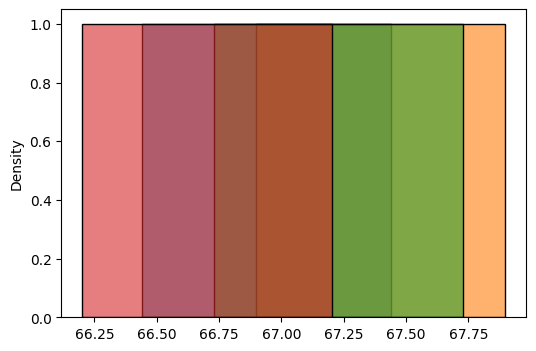

In [ ]:
#Plotting the figure
plt.figure(figsize=(6, 4))
for sample_size, sample_means in sample_means_dict.items():
    sns.histplot(sample_means, kde=True, label=f'Sample Size {sample_size}', alpha=0.6, stat='density')

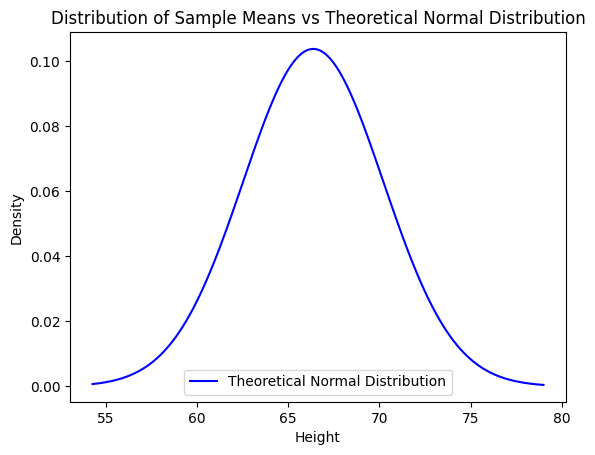

In [ ]:
# Plot the theoretical normal distribution
pop_mean = np.mean(population)
pop_std = np.std(population)
x = np.linspace(min(ht), max(ht), 1000)
y = (1 / (np.sqrt(2 * np.pi) * pop_std)) * np.exp(-0.5 * ((x - pop_mean) / pop_std) ** 2)
plt.plot(x, y, label='Theoretical Normal Distribution', color='blue')

plt.title('Distribution of Sample Means vs Theoretical Normal Distribution')
plt.xlabel('Height')
plt.ylabel('Density')
plt.legend()
plt.show()

In above codes, histograms of sample means for different sample sizes were generated and overlayed them with the theoretical normal distribution curve based on the population mean and standard deviation. As the Central Limit Theorem holds, it is observed that as the sample size increases, the distribution of sample means approaches a normal distribution.

**TASK2: Perform the Bootstrap on ”Height” feature of the data.**

In [ ]:
# Defining function to compute the mean from a bootstrap sample
def bootstrap_mean(data, n_samples):
    bootstrap_means = []
    for _ in range(n_samples):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_mean = np.mean(bootstrap_sample)
        bootstrap_means.append(bootstrap_mean)
    return bootstrap_means

In [ ]:
#Setting number of bootstrap samples
n_bootstrap_samples = 1000

# Performing bootstrap resampling
bstrap_means = bootstrap_mean(ht, n_bootstrap_samples)

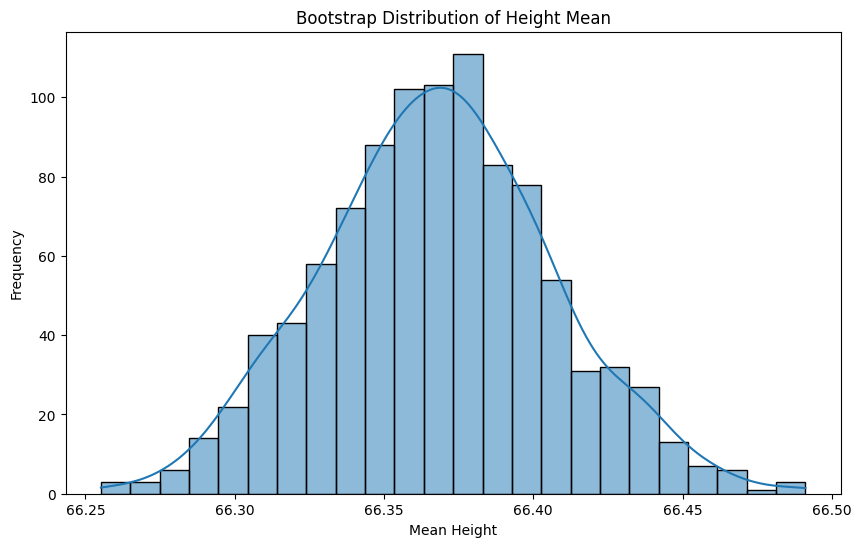

In [ ]:
# Plotting the graph
plt.figure(figsize=(10, 6))
sns.histplot(bstrap_means, kde=True)
plt.title('Bootstrap Distribution of Height Mean')
plt.xlabel('Mean Height')
plt.ylabel('Frequency')
plt.show()

**TASK3:Calculate the Confidence Interval of 95 % using sample means derived using Bootstrap**

In [ ]:
# Calculate the 95% confidence interval
confidence_intv = np.percentile(bstrap_means, [2.5, 97.5])

print("95% Confidence Interval of Height Mean:", confidence_intv)

95% Confidence Interval of Height Mean: [66.29343001 66.44331953]
